In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import zipfile
import io

In [3]:
def read_csv_from_zip(zip_file, state=None, year=None):
    """
    Reads a CSV file from a zip file, given a state and year. Returns a Pandas DataFrame.
    
    Parameters:
        - zip_file: The name of the zip file to read from.
        - state: The two-letter state code to read from (e.g. "RJ"). Optional.
        - year: The year to read from (e.g. 2003). Optional.
        
    Returns:
        A Pandas DataFrame containing the contents of the CSV file(s).
    """
    zf = zipfile.ZipFile(zip_file)
    
    if state and year:
        filename = f"ETLSINASC.DNRES_{state}_{year}_t.csv"
        if filename in zf.namelist():
            with zf.open(filename) as f:
                df = pd.read_csv(io.StringIO(f.read().decode()), on_bad_lines='skip')
            return df
        else:
            raise ValueError(f"No file found for state '{state}' and year '{year}'.")
    
    elif state:
        dfs = []
        for file in zf.namelist():
            if file.endswith(".csv") and f"_{state}_" in file:
                year = file.split("_")[-2]
                print(year)
                with zf.open(file) as f:
                    df = pd.read_csv(io.StringIO(f.read().decode()), on_bad_lines='skip')
                dfs.append(df)
        if len(dfs) == 0:
            raise ValueError(f"No files found for state '{state}'.")
        else:
            return pd.concat(dfs, ignore_index=True)
    
    elif year:
        dfs = pd.DataFrame()
        for file in zf.namelist():
            if file.endswith(".csv") and f"_{year}_" in file:
                state = file.split("_")[2]
                with zf.open(file) as f:
                    df = pd.read_csv(io.StringIO(f.read().decode()), on_bad_lines='skip')
                dfs = pd.concat([dfs, df], axis=0, ignore_index=True)
        if len(dfs) == 0:
            raise ValueError(f"No files found for year '{year}'.")
        else:
            return dfs
    
    else:
        raise ValueError("At least one of 'state' and 'year' must be specified.")


zip_path = "/Users/luisnakayama/Downloads/ETLSINASC.zip"



## Dataframe com dados de São Paulo entre 1996 a 2020

In [4]:

dfsp = read_csv_from_zip(zip_path, state="SP")

1996


/var/folders/r7/8t_r52_d27v1gc9dw9h8l4_40000gn/T/ipykernel_43422/1227038755.py:1: DtypeWarning: Columns (68,69) have mixed types.Specify dtype option on import or set low_memory=False.
  dfsp = read_csv_from_zip(zip_path, state="SP")


1997
1998
1999


/var/folders/r7/8t_r52_d27v1gc9dw9h8l4_40000gn/T/ipykernel_43422/1227038755.py:1: DtypeWarning: Columns (20,73,74,75,76) have mixed types.Specify dtype option on import or set low_memory=False.
  dfsp = read_csv_from_zip(zip_path, state="SP")


2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010


/var/folders/r7/8t_r52_d27v1gc9dw9h8l4_40000gn/T/ipykernel_43422/1227038755.py:1: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  dfsp = read_csv_from_zip(zip_path, state="SP")


2011
2012
2013


/var/folders/r7/8t_r52_d27v1gc9dw9h8l4_40000gn/T/ipykernel_43422/1227038755.py:1: DtypeWarning: Columns (44) have mixed types.Specify dtype option on import or set low_memory=False.
  dfsp = read_csv_from_zip(zip_path, state="SP")


2014


/var/folders/r7/8t_r52_d27v1gc9dw9h8l4_40000gn/T/ipykernel_43422/1227038755.py:1: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  dfsp = read_csv_from_zip(zip_path, state="SP")


2015
2016
2017
2018
2019
2020


In [5]:
dfsp.columns

Index(['contador', 'LOCNASC', 'CODMUNNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE',
       'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       ...
       'CODUFNATU', 'TPNASCASSI', 'ESCMAEAGR1', 'DTRECORIGA', 'TPFUNCRESP',
       'TPDOCRESP', 'DTDECLARAC', 'PARIDADE', 'KOTELCHUCK', 'CONTADOR'],
      dtype='object', length=131)

### Missing values

In [6]:
dfsp.isna().sum().sort_values()

res_NOME_UF             0
nasc_CAPITAL            0
nasc_MSAUDCOD           0
nasc_RSAUDCOD           0
nasc_CSAUDCOD           0
                   ...   
NUMREGCART       15640735
nasc_SUCESSOR    15652602
res_ANOEXT       15652602
nasc_ANOEXT      15652602
res_SUCESSOR     15652602
Length: 131, dtype: int64

## Casos totais em dataframe por ano

In [7]:
dfsp.ano_nasc.value_counts()

1999    714428
1997    701947
1996    699013
1998    693413
2000    687779
2015    634026
2001    632483
2014    625687
2002    623302
2005    618880
2004    618080
2012    616608
2017    611803
2013    610896
2003    610555
2011    610222
2018    606146
2006    603368
2008    601795
2016    601437
2010    601352
2009    598473
2007    595408
2019    583191
2020    552310
Name: ano_nasc, dtype: int64

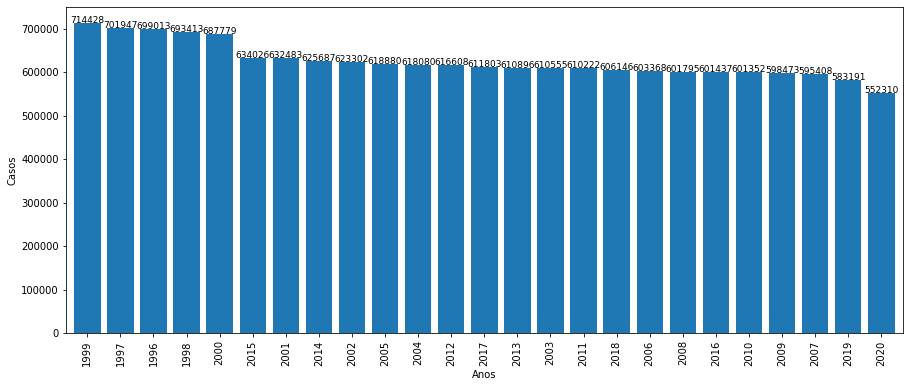

In [8]:
plt.figure(figsize=(15, 6)) 

ax=dfsp.ano_nasc.value_counts().plot(kind="bar", width=0.8)
plt.xlabel('Anos')
plt.ylabel('Casos')
for i, v in enumerate(dfsp.ano_nasc.value_counts()):
    ax.text(i, v + 50, str(v), ha='center', fontsize=9) 

# Show the plot
plt.show()

## Análise materna  

### Idade

In [9]:
#missing idade
dfsp.IDADEMAE.isna().sum()

6908

In [10]:
dfsp.IDADEMAE.describe()

count    1.564569e+07
mean     2.650326e+01
std      6.751102e+00
min      0.000000e+00
25%      2.100000e+01
50%      2.600000e+01
75%      3.100000e+01
max      9.900000e+01
Name: IDADEMAE, dtype: float64

In [11]:
#Agrupar maes adolescentes e criar variável
def maeadolescente(x): 
    if x<18: return 'yes' 
    if x>18: return 'no' 
    else: return 'NaN'
dfsp['mae_adolescente'] = dfsp.IDADEMAE.apply(maeadolescente)

In [12]:
dfsp.mae_adolescente.value_counts()

no     13875496
yes     1139767
NaN      637339
Name: mae_adolescente, dtype: int64

## Prematuridade

In [13]:
dfsp.parto_prematuro.value_counts()

0.0    13618273
2.0      728311
3.0      683212
1.0      551020
Name: parto_prematuro, dtype: int64

In [14]:
#show missing values em prematuros
dfsp.parto_prematuro.isna().sum()

71786

In [15]:
#Agrupar prematuros e criar variável
def prematuro(x): 
    if x==0: return 'no' 
    if x>0: return 'yes' 
    else: return 'NaN'
dfsp['prematuro'] = dfsp.parto_prematuro.apply(prematuro)

In [16]:
prematuro_yes = dfsp[dfsp['prematuro'] == 'yes']
prematuro_yes.groupby('ano_nasc')['prematuro'].count()

ano_nasc
1996    59413
1997    60676
1998    59714
1999    72633
2000    80575
2001    81705
2002    72505
2003    72798
2004    72952
2005    72770
2006    72860
2007    71768
2008    73877
2009    75068
2010    75689
2011    80287
2012    98837
2013    95617
2014    93124
2015    90865
2016    86464
2017    87610
2018    88330
2019    85413
2020    80993
Name: prematuro, dtype: int64

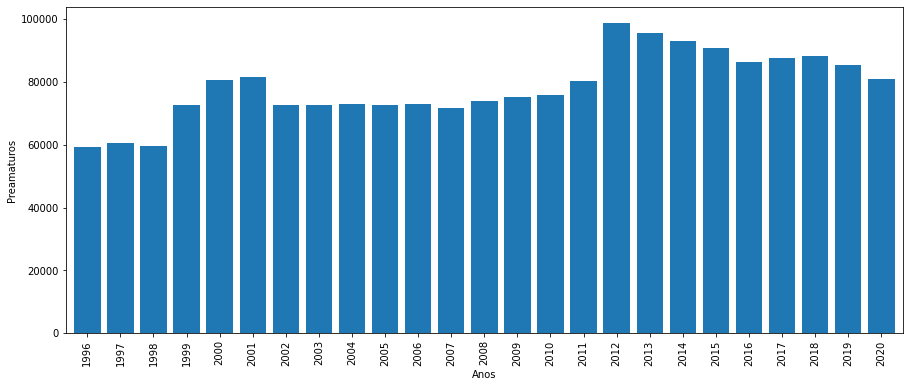

In [17]:
plt.figure(figsize=(15, 6)) 
prematuro_yes.groupby('ano_nasc')['prematuro'].count().plot(kind="bar",width=0.8)
plt.xlabel('Anos')
plt.ylabel('Preamaturos')
plt.show()

## Prematuros por variáveis demográficas

In [18]:
dfsp.groupby('RACACOR')['prematuro'].value_counts()


RACACOR  prematuro
1        no           7889492
         yes          1141034
         NaN            34281
2        no            370300
         yes            66826
         NaN              729
3        no             52051
         yes             7740
         NaN              253
4        no           2947744
         yes           472891
         NaN             6366
5        no             13476
         yes             1998
         NaN              130
9        no           2345210
         yes           272054
         NaN            30027
Name: prematuro, dtype: int64

<AxesSubplot:xlabel='def_raca_cor'>

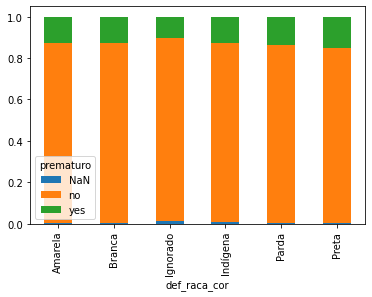

In [19]:
proportions=dfsp.groupby('def_raca_cor')['prematuro'].value_counts(normalize=True)
wide_proportions = proportions.unstack()

wide_proportions.plot(kind='bar', stacked=True)

In [20]:
dfsp.groupby('def_escol_mae')['prematuro'].value_counts(normalize=True)

def_escol_mae  prematuro
1 a 3 anos     no           0.867404
               yes          0.125652
               NaN          0.006944
12 e mais      no           0.871840
               yes          0.127121
               NaN          0.001039
4 a 7 anos     no           0.861347
               yes          0.136505
               NaN          0.002148
8 a 11 anos    no           0.867799
               yes          0.131309
               NaN          0.000892
Ignorado       no           0.885668
               yes          0.092354
               NaN          0.021978
Nenhuma        no           0.852021
               yes          0.142285
               NaN          0.005694
Name: prematuro, dtype: float64

<AxesSubplot:xlabel='def_escol_mae'>

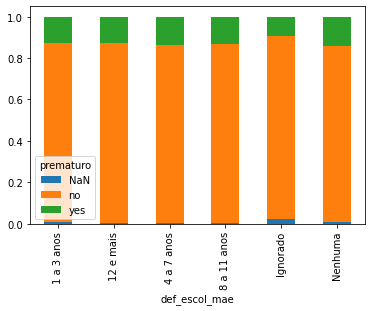

In [21]:
proportions=dfsp.groupby('def_escol_mae')['prematuro'].value_counts(normalize=True)
wide_proportions = proportions.unstack()

wide_proportions.plot(kind='bar', stacked=True)

In [22]:
dfsp.groupby('mae_adolescente')['prematuro'].value_counts()

mae_adolescente  prematuro
NaN              no             544946
                 yes             84106
                 NaN              8287
no               no           12111202
                 yes           1707554
                 NaN             56740
yes              no             962125
                 yes            170883
                 NaN              6759
Name: prematuro, dtype: int64

<AxesSubplot:xlabel='mae_adolescente'>

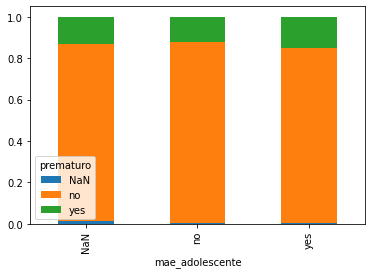

In [23]:
proportions=dfsp.groupby('mae_adolescente')['prematuro'].value_counts(normalize=True)
wide_proportions = proportions.unstack()

wide_proportions.plot(kind='bar', stacked=True)

In [24]:
dfsp.groupby('def_anomalia')['mae_adolescente'].value_counts()

def_anomalia  mae_adolescente
Ignorado      no                   631638
              yes                   58471
              NaN                   33579
Não           no                 10139209
              yes                  756496
              NaN                  417014
Sim           no                   107583
              yes                    7905
              NaN                    4127
Name: mae_adolescente, dtype: int64